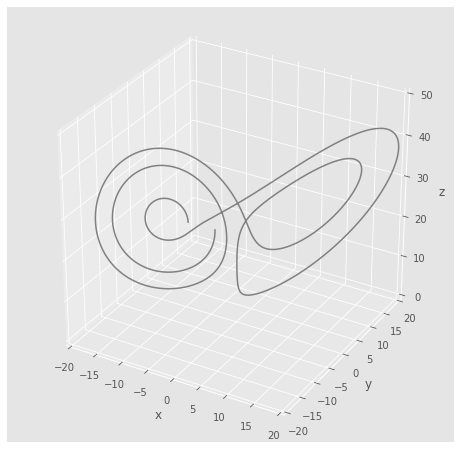

In [12]:
import numpy as np
import LORENZ63
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
lz, = ax.plot3D(np.zeros(1), np.zeros(1), np.zeros(1), 'gray')
x,y,z = [],[],[]

def animate(i):
    if i == 0:
        x_init = np.array([1.508870, -1.531271, 25.46091])
    else:
        x_init = np.array((x[50],y[50],z[50]))
        for i in range(50):
            x.pop(0)
            y.pop(0)
            z.pop(0)
    x_vals = LORENZ63.assimilation.run_forward(x_init, 4000, .001)

    if i == 0:
        x.extend(x_vals[:,0].tolist())
        y.extend(x_vals[:, 1].tolist())
        z.extend(x_vals[:, 2].tolist())
    else:
        x.extend(x_vals[-50:, 0].tolist())
        y.extend(x_vals[-50:, 1].tolist())
        z.extend(x_vals[-50:, 2].tolist())

    lz.set_data(x_vals[:,0],x_vals[:,1])
    lz.set_3d_properties(x_vals[:,2])

    return lz,

def init():

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 50)

    return lz,
step = 10
steps = np.arange(0, 1000)
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
from IPython.display import HTML
HTML(ani.to_html5_video())
